# Exploratory Analysis - Wildfire Dataset

March 24, 2020

Author: Rohit Mishra
___

Objective: Develop an understanding of the wildfire dataset based on the three variables assigned - Fire Year, Discovery Day of Year, Discovery Date and Discovery Time
___

In [46]:
# importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Reading the Data

data = pd.read_csv("wildfireData.csv")

/Users/RSM/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
# Description of the dataframe - column names, and data types of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
OBJECTID                      int64
FOD_ID                        int64
FPA_ID                        object
SOURCE_SYSTEM_TYPE            object
SOURCE_SYSTEM                 object
NWCG_REPORTING_AGENCY         object
NWCG_REPORTING_UNIT_ID        object
NWCG_REPORTING_UNIT_NAME      object
SOURCE_REPORTING_UNIT         object
SOURCE_REPORTING_UNIT_NAME    object
LOCAL_FIRE_REPORT_ID          object
LOCAL_INCIDENT_ID             object
FIRE_CODE                     object
FIRE_NAME                     object
ICS_209_INCIDENT_NUMBER       object
ICS_209_NAME                  object
MTBS_ID                       object
MTBS_FIRE_NAME                object
COMPLEX_NAME                  object
FIRE_YEAR                     int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                 int64
DISCOVERY_TIME                float64
STAT_CAUSE_CODE               int64
ST

___
The data is over 500 MBs in size with 1880465 entries and 39 features. Most of the columns contain strings. About a half of the columns list the IDs for the fire under different organizations and hierarchies. The other columns describe the location, time, cause and size of the fires. 
___

In [49]:
# Printing the columns that have missing values and the number of missing values in each

x = data.isna().sum() # No. of columns with NA

for i in range(len(x)): 
    if (x[i] > 0):
        print("{}\n{}\n".format(x.index[i],x[i]))
        

LOCAL_FIRE_REPORT_ID
1459286

LOCAL_INCIDENT_ID
820821

FIRE_CODE
1555741

FIRE_NAME
960479

ICS_209_INCIDENT_NUMBER
1854748

ICS_209_NAME
1854748

MTBS_ID
1869462

MTBS_FIRE_NAME
1869462

COMPLEX_NAME
1875282

DISCOVERY_TIME
882638

CONT_DATE
891531

CONT_DOY
891531

CONT_TIME
972553

COUNTY
678148

FIPS_CODE
678148

FIPS_NAME
678148



In [50]:
# Necessary preprocessing 

data = data.drop(['Shape'], axis = 1)
print(data.shape)

# Visualizing a part of the dataframe

data.head()

(1880465, 38)


OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME    ...     FIRE_SIZE  \
0                   511     Plumas National Forest    ...          0.10   
1                   503   Eldorado National Forest    ...          0.25   
2                   503   Eldorado National Forest    ...          0.10   
3                   503   Eldorado National Forest    ...          0.10   
4                   503   Eldorado National Forest    ...          0.10   

  FIRE_SIZE_CLASS   LATITUDE   LONGITUDE OWNER_CODE       OWNER_DESCR STATE  \
0               A  40.036944 -121.005833          5              USFS    CA   
1               A  38.933056 -120.404444          5              USFS    CA   
2               A  38.984167 -120.735556         13  STATE OR PRIVATE    CA   
3               A  38.559167 -119.913333          5              USFS    CA   
4               A  38.559167 -119.933056          5              USFS    CA   

  COUNTY FIPS_CODE  FIPS_NAME  
0     63      63.0     Plumas  
1     61      61.0     Placer  
2     17      17.0  El Dorado  
3      3       3.0     Alpine  
4      3       3.0     Alpine  

[5 rows x 38 columns]

In [51]:
data.columns = [i.replace('_',' ').lower() for i in data.columns]

In [52]:
data.columns

Index(['objectid', 'fod id', 'fpa id', 'source system type', 'source system',
       'nwcg reporting agency', 'nwcg reporting unit id',
       'nwcg reporting unit name', 'source reporting unit',
       'source reporting unit name', 'local fire report id',
       'local incident id', 'fire code', 'fire name',
       'ics 209 incident number', 'ics 209 name', 'mtbs id', 'mtbs fire name',
       'complex name', 'fire year', 'discovery date', 'discovery doy',
       'discovery time', 'stat cause code', 'stat cause descr', 'cont date',
       'cont doy', 'cont time', 'fire size', 'fire size class', 'latitude',
       'longitude', 'owner code', 'owner descr', 'state', 'county',
       'fips code', 'fips name'],
      dtype='object')

In [53]:
feature_list = ['objectid','fire year', 'discovery date', 'discovery doy',
       'discovery time', 'stat cause code', 'stat cause descr', 'cont date',
       'cont doy', 'cont time', 'fire size', 'fire size class', 'latitude',
       'longitude', 'owner code', 'owner descr', 'state']
data = data[feature_list]

Text(0.5, 0, 'States')

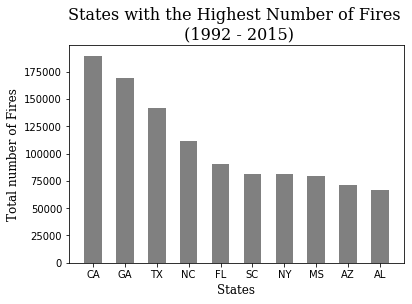

In [54]:
# Number of Fires By State

NoOfFiresByState = (data.groupby("state")["objectid"].count()).sort_values(ascending = False)

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 16,
        }

font_labels = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 12,
        }

plt.bar(x=NoOfFiresByState.index[:10], 
        height = NoOfFiresByState.values[:10],
       width = 0.55,
       color = 'grey')
plt.title("States with the Highest Number of Fires \n (1992 - 2015)", fontdict = font_title)
plt.ylabel("Total number of Fires", fontdict = font_labels)
plt.xlabel("States", fontdict = font_labels)


Text(0.5, 0, 'Causes')

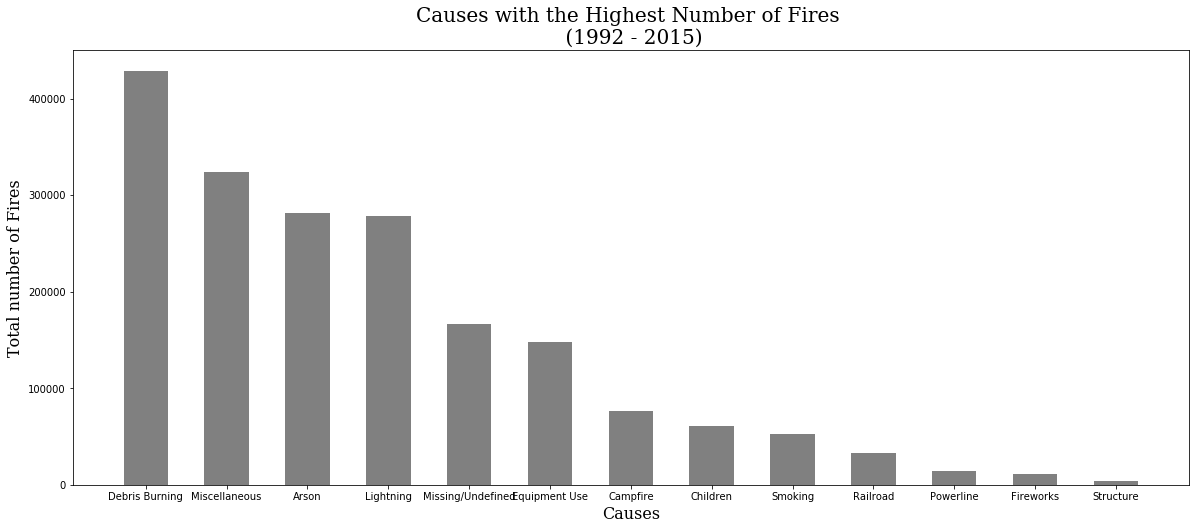

In [57]:
# Different Causes of Fires

FireCauses = (data.groupby(["stat cause descr"], as_index = False)["objectid"].count()).sort_values(
    by = ['objectid'],ascending = False)


font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 20,
        }

font_labels = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 16,
        }


fig = plt.figure(figsize = (20,8))

plt.bar(x= FireCauses['stat cause descr'].values, 
        height = FireCauses.objectid.values,
       width = 0.55,
       color = 'grey')
plt.title("Causes with the Highest Number of Fires \n (1992 - 2015)", fontdict = font_title)
plt.ylabel("Total number of Fires", fontdict = font_labels)
plt.xlabel("Causes", fontdict = font_labels)



In [58]:
factors = ['fire year', 'discovery doy', 'discovery time', 'stat cause code', 'cont time', 'fire size']
data[factors].describe()

fire year  discovery doy  discovery time  stat cause code  \
count  1.880465e+06   1.880465e+06   997827.000000     1.880465e+06   
mean   2.003710e+03   1.647191e+02     1453.014326     5.979037e+00   
std    6.663099e+00   9.003891e+01      405.960963     3.483860e+00   
min    1.992000e+03   1.000000e+00        0.000000     1.000000e+00   
25%    1.998000e+03   8.900000e+01     1240.000000     3.000000e+00   
50%    2.004000e+03   1.640000e+02     1457.000000     5.000000e+00   
75%    2.009000e+03   2.300000e+02     1708.000000     9.000000e+00   
max    2.015000e+03   3.660000e+02     2359.000000     1.300000e+01   

           cont time     fire size  
count  907912.000000  1.880465e+06  
mean     1534.832080  7.452016e+01  
std       432.737694  2.497598e+03  
min         0.000000  1.000000e-05  
25%      1310.000000  1.000000e-01  
50%      1600.000000  1.000000e+00  
75%      1810.000000  3.300000e+00  
max      2359.000000  6.069450e+05

___
About 9 million fires occured in the 12 years period between 1992-2004. The remaining 9 million fires occured in the 11 year period between 2004-2015. Thus, there has been no drastic change in the number of fires in these two time periods. 

Most of the fires occur in the first 230 days of a year with half of the total occuring in the first 164 days. 

Over 75% of the fires are discover post noon with 50% being discovered after 3 pm. This makes sense because the light conditions are conducive to spot fires, especially wildfires.

50% of the fires have spanned less than an acre. About 25% of the fires have been larger than 3 acres with the largest being 606945 acres.
___

# Exploring number of occurences of fires by year

Text(0, 0.5, 'No. of Fires')

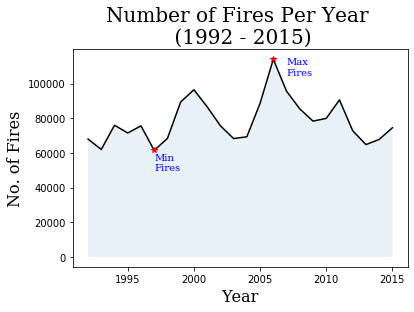

In [122]:
y = (data.groupby(['fire year']))['objectid'].count()

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 20,
        }

font_labels = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 16,
        }

font_annot = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 10,
        }

plt.plot(y.index , y.values, c = 'black')
plt.fill_between(y.index , y.values,alpha = 0.1)
plt.plot(y.index[y == min(y)], min(y), 'r*')
plt.text( 1997,50000, 'Min\nFires',fontdict = font_annot, horizontalalignment = 'left')
plt.plot(y.index[y == max(y)], max(y), 'r*')
plt.text( 2007,115004, 'Max\nFires', fontdict = font_annot,  horizontalalignment = 'left', verticalalignment= 'top')
plt.title("Number of Fires Per Year \n (1992 - 2015)", fontdict = font_title)
plt.xlabel("Year", fontdict = font_labels)
plt.ylabel("No. of Fires",  fontdict = font_labels)


___
From the analysis above it is clear that the year 2006 has the most number of fire occurences and 1997 has the least. One of our first hypotheses was that the occurence of a fire would strongly correlate with the climate data. More preciseley, as one of the main reasons for a fire is high temperature, the increasing global temperature (show in the figure below) should cause more fires with each passing year.

![alt txt](http://berkeleyearth.org/wp-content/uploads/2019/01/GlobalAverage_2018.png "Trend in Average Global Temperature" )


However, as our data also includes fires due to non-natural causes, we extract the naturally caused fires to explore the relevance of our hypothesis.
___

Text(0.5, 1.0, 'Naturally Caused Forest Fires')

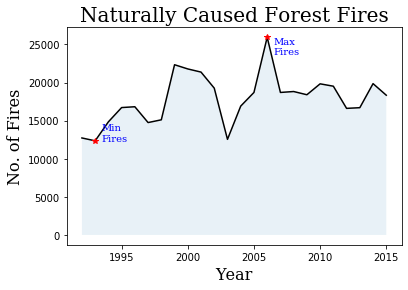

In [123]:
y = (data[data['stat cause descr'] == 'Debris Burning'].groupby(['stat cause descr','fire year']))['objectid'].count()


font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 20,
        }

font_labels = {'family': 'serif',
        'color':  'black',
        'weight': 'medium',
        'size': 16,
        }

font_annot = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 10,
        }

plt.plot(y.index.levels[1] , y.values, c = 'black')
plt.fill_between(y.index.levels[1] , y.values, alpha = 0.1)
plt.plot(y.index.levels[1][y == min(y)], min(y), 'r*')
plt.text(1993.5,12353,'Min\nFires', fontdict = font_annot)
plt.plot(y.index.levels[1][y == max(y)], max(y), 'r*')
plt.text(2006.5,25951,'Max\nFires', fontdict = font_annot, verticalalignment = 'top')
plt.xlabel("Year", fontdict = font_labels)
plt.ylabel("No. of Fires", fontdict = font_labels)
plt.title("Naturally Caused Forest Fires", fontdict = font_title)


The above plot doesn't support our hypothesis that the frequency of forest fires has an increasing trend that mimics the increasing trend of the global temperature. Now, we need to see which factors have been the prominent cause of fire each year. 
___

Text(0.5, 0.98, 'Trend in Number of Fires Per Year for Different Causes of Fire')

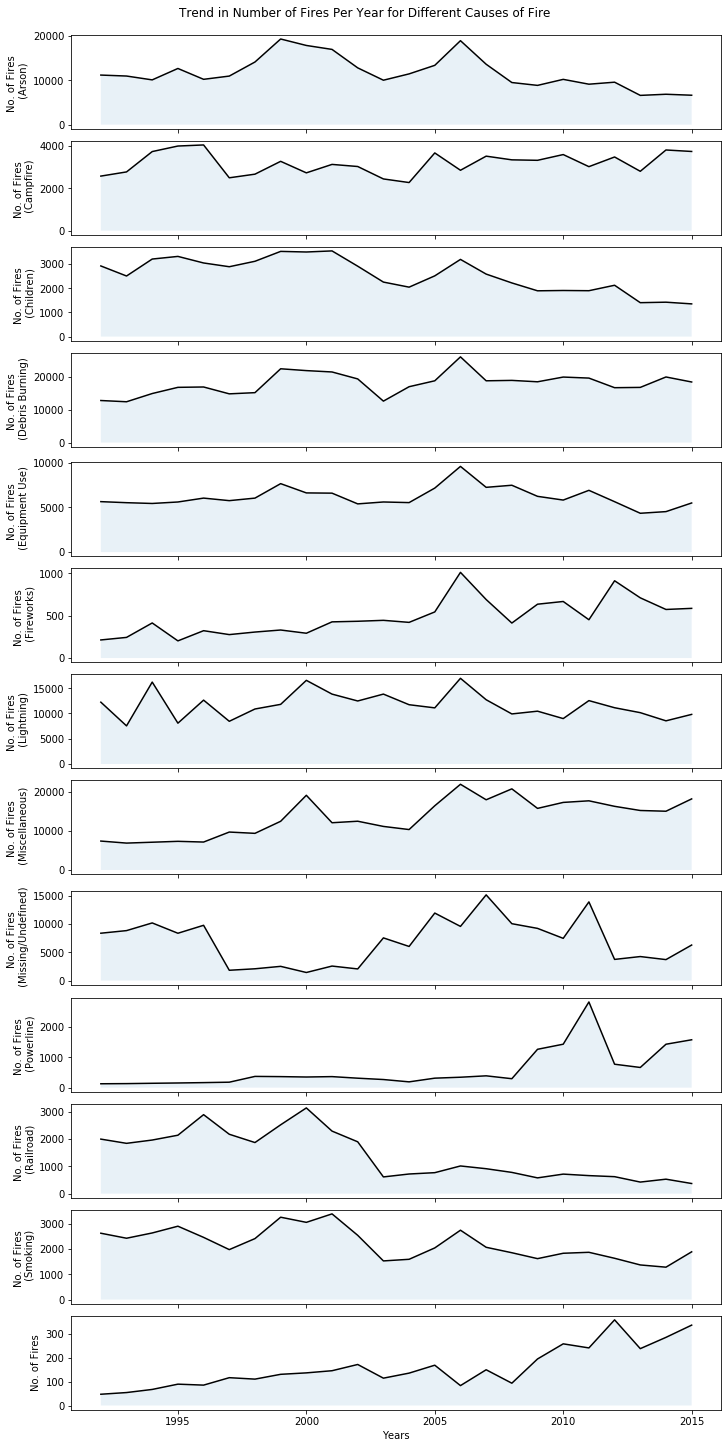

In [149]:
y = (data.groupby(['stat cause descr','fire year']))['objectid'].count()



fig,ax = plt.subplots(13,1,figsize = (10,20),constrained_layout = True, sharex= True)

for i in range(len(y.index.levels[0])):
    ax[i].plot(y[y.index.labels[0]== i].index.levels[1].values, y[y.index.labels[0]== i].values, c = 'black')
    ax[i].fill_between(y[y.index.labels[0]== i].index.levels[1].values, y[y.index.labels[0]== i].values, alpha = 0.1)
    ax[i].set(ylabel = 'No. of Fires \n ({})'.format(y.index.levels[0][i]))

plt.ylabel('No. of Fires')
plt.xlabel('Years')
fig.suptitle('Trend in Number of Fires Per Year for Different Causes of Fire')
    


On analyzing the frequency of fires based on their cause, it can be clearly observed that fires due to smoking, railroad, equipment use, children and arson have a decreasing trend. Fires due to campfire and debris burning don't show any significant trend. Finally, causes such as structural fire, powerline, fireworks show an increasing trend. It is important to notice that in the year 2006 there was an increase in fires due to smoking, lightning, fireworks, debris burning, children and arson. Some of these trends such as increase in structural fires can be explained by the increase in number of houses and buildings over the years. 


Next, we explore the 5 main causes of fire in each state and how that has changed over time 

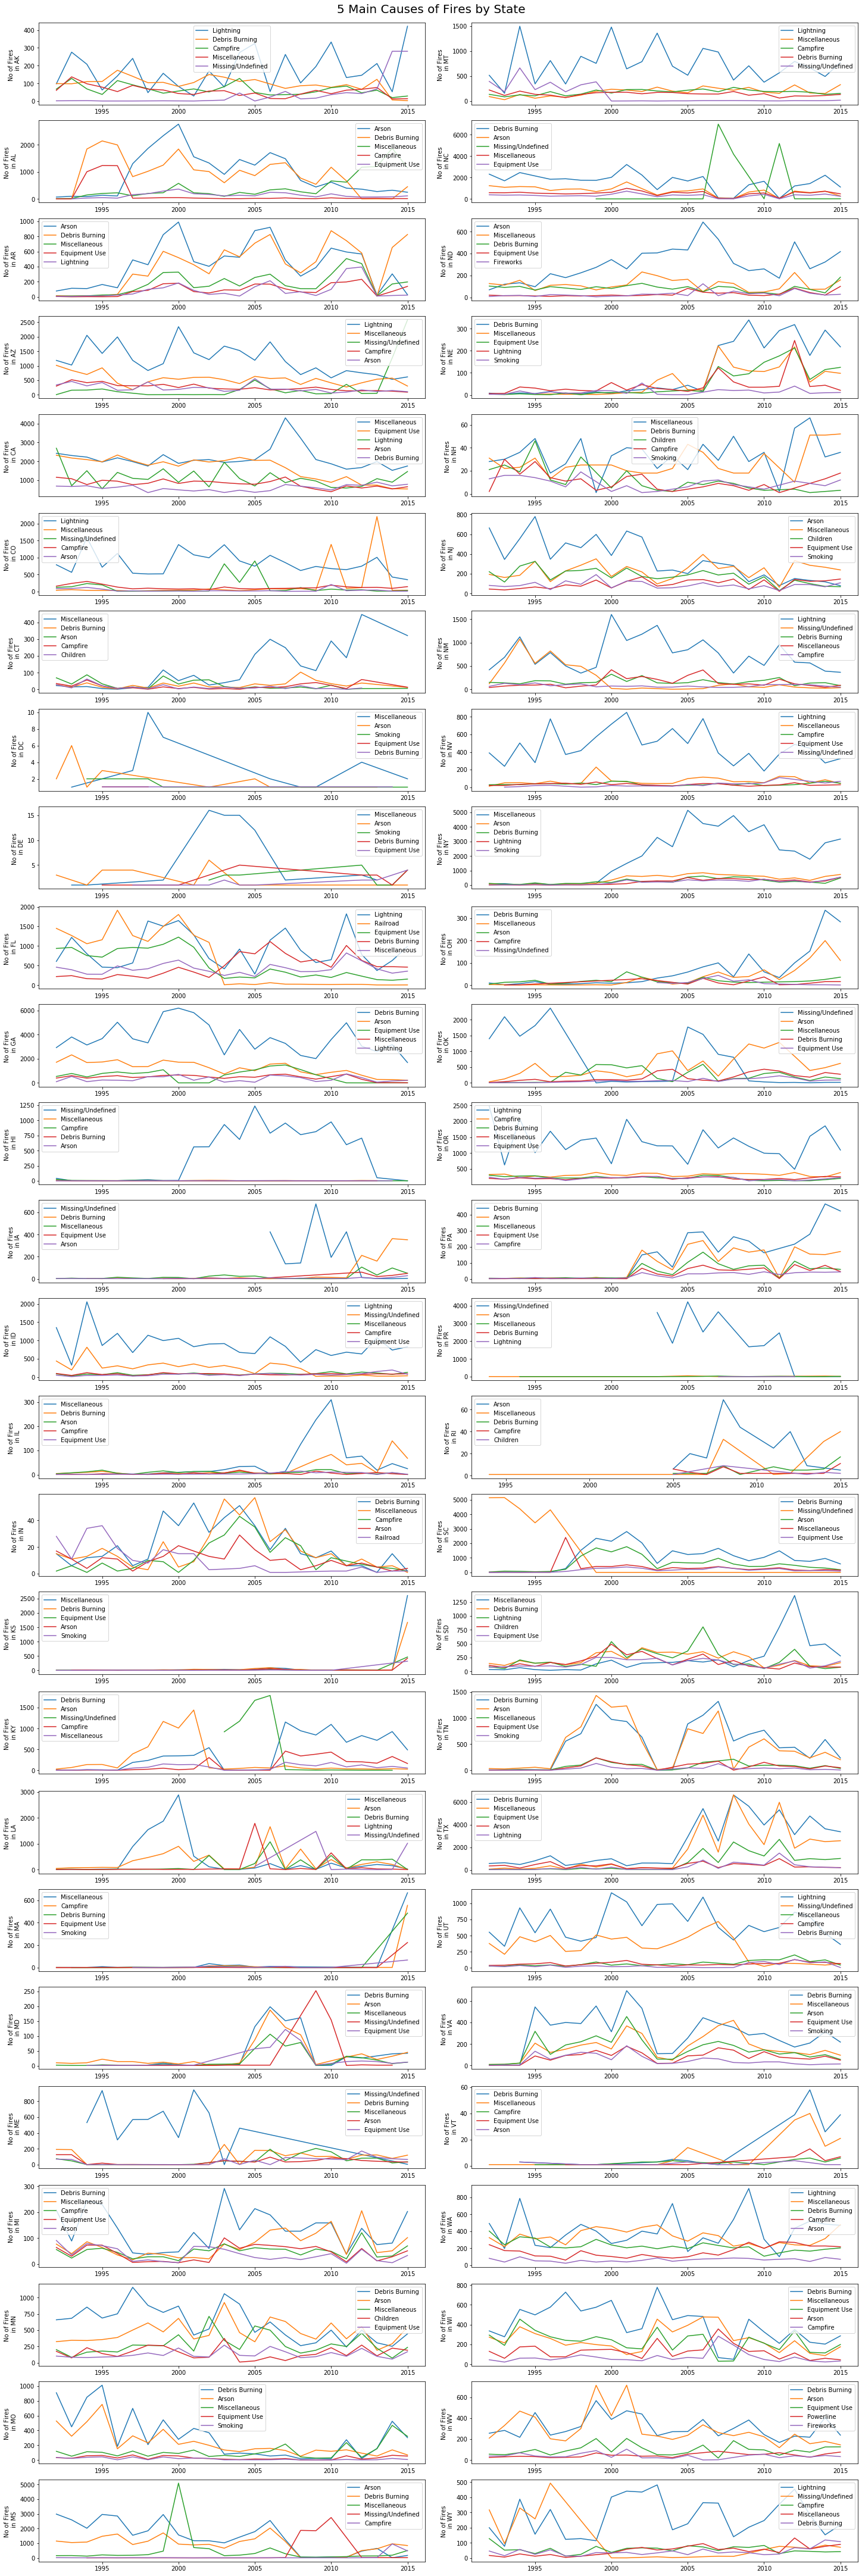

In [148]:
# Extracting the 5 main causes of fire for each state

z = (data.groupby(['state','stat cause descr']))['objectid'].count()

state_list = z.index.levels[0]
x = []
for i in range(len(state_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:5])


# Extracting the number of fires by year for each state given the fire cause

y = (data.groupby(['state','stat cause descr','fire year']))['objectid'].count()

state_list = y.index.levels[0]


# Plotting the trend in the occurence of fires due to the top 5 causes by each state

fig, ax = plt.subplots(26,2,figsize = (20,60), constrained_layout = True)
fig.suptitle('5 Main Causes of Fires by State', fontsize = 20)

for i in range(len(state_list)):
    j = i//26
    k = i - (j*26)
    
    stat_cause_list = []
    
    for l in x[i]:
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'No of Fires \n in {}'.format(state_list[i]))
    
    ax[k,j].legend()




It can be observed that almost all the states are unique when it comes to the causes for these fires and the trends in these causes over the years. We will need a model which will be able to capture this spatio-temporal nature of the data.
___

Next, the fire caused in areas that are owned by different owners are analyzed. 

Text(0, 0.5, 'Number of Fires\n(1992-2015)')

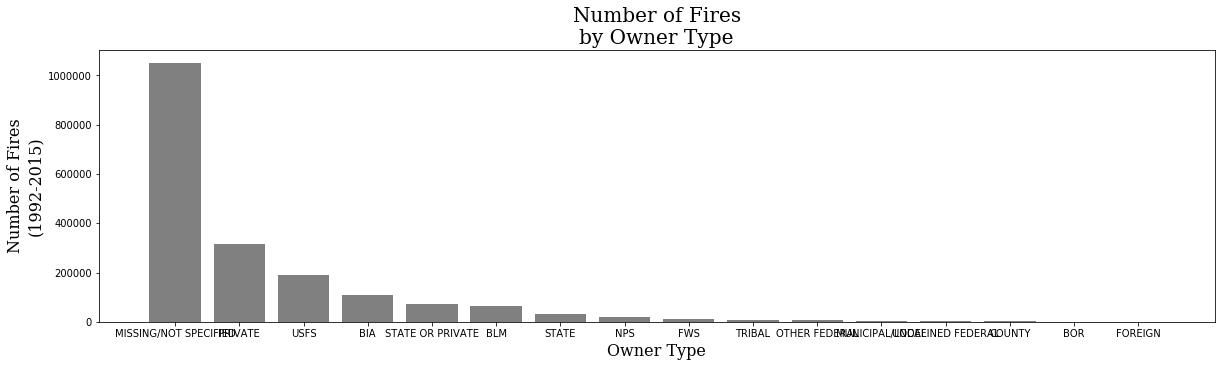

In [159]:
# Extracting the top 10 types of owners that have lands which contribute most to the number of fires

z = (data.groupby(['owner descr']))['objectid'].count().sort_values(ascending = False)
owners = list(z.index[:9])

# Extracting the part of the data that pertains to only the top 10 owner types
sub_data = data.loc[data['owner descr'].isin(owners)]

# Counting the number of fire instances per owner type
y = (sub_data.groupby(['owner descr','fire year']))['objectid'].count()


# Plotting number of fires by owner type 

fig = plt.figure(figsize = (20,5))
plt.bar(height = z, x = z.index, color = 'grey')
plt.title('Number of Fires\nby Owner Type', fontdict = font_title)
plt.xlabel('Owner Type', fontdict = font_labels)
plt.ylabel('Number of Fires\n(1992-2015)', fontdict = font_labels)

It can be seen that the number of fires caused over time greatly depends on the owner type. However, there is a large fraction of fires for which the land owner is not specified. [We will explore how to deal with this data later]. For now we will go further and see how the fire frequence (fires per year) changes over time, especially for the top contributing land owner types

Text(0.5, 0.98, 'Trend in Number of Fires by Owner Type')

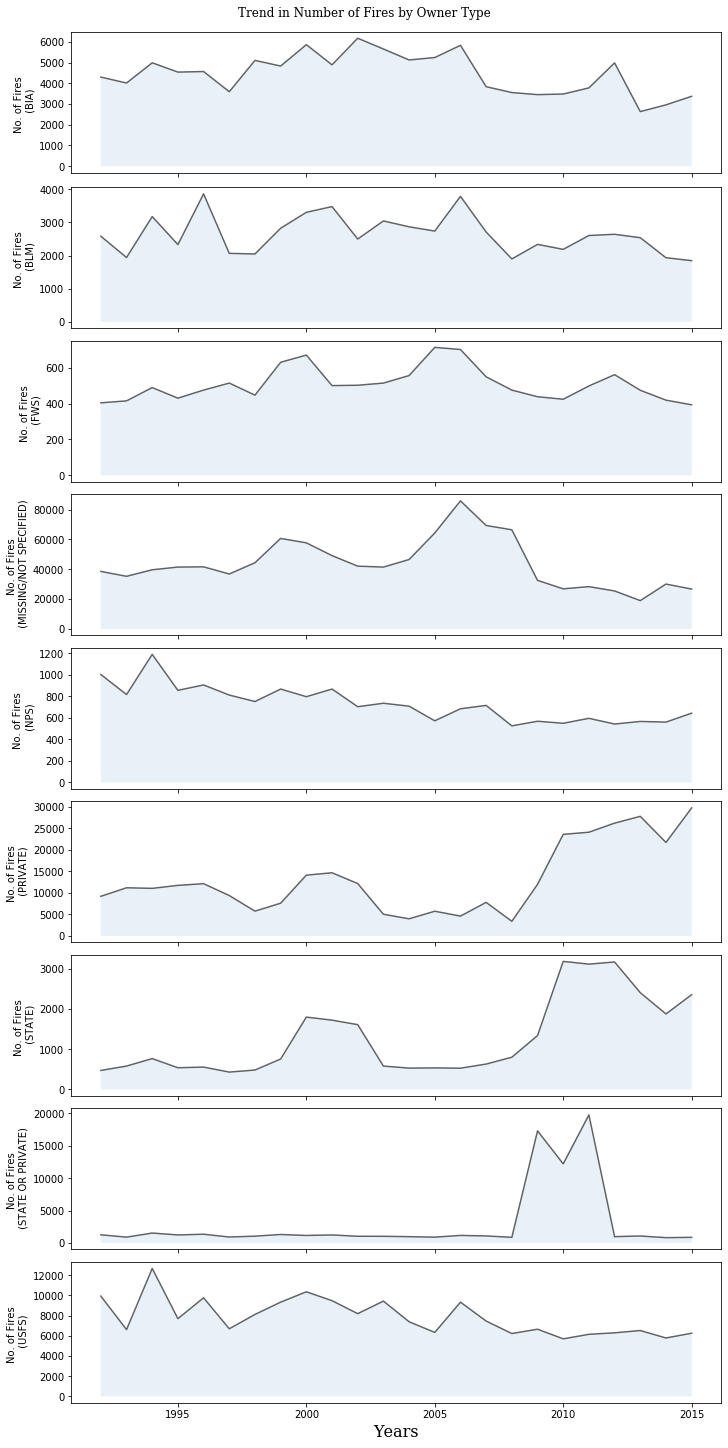

In [160]:
# plotting the trend in the number of fires by owner type
fig,ax = plt.subplots(9,1,figsize = (10,20),constrained_layout = True,sharex= True)

for i in range(len(y.index.levels[0])):
    ax[i].plot(y[y.index.levels[0][i]].index, y[y.index.levels[0][i]].values,color = 'black', alpha = 0.6)
    ax[i].fill_between(y[y.index.levels[0][i]].index, y[y.index.levels[0][i]].values,alpha = 0.1)
    ax[i].set(ylabel = 'No. of Fires \n ({})'.format(y.index.levels[0][i]))
plt.xlabel('Years', fontdict = font_labels)
fig.suptitle('Trend in Number of Fires by Owner Type', fontdict = font_title)

    

Yet again, we see that fire frequencies show an upward trend for some of the owner types and a downward trend for some. [Therefore, we need an algorithm that will be able to model this attribute]. The parameter, state or private is confusing and has one area where it has gone up. A possible explanation would be that different states/agencies record these occurences under different categories and possibly there higher number of these recordings in that particular time interval. BIA and FWS owner types show an increase and then a decrease in the fire frequencies. [We need to explore why that happened.]
___

# Exploring number of fires based on discovery day of the year



Text(0.5, 1.0, 'Number of Fires Discovered by the Day of the Year\n1992-2015')

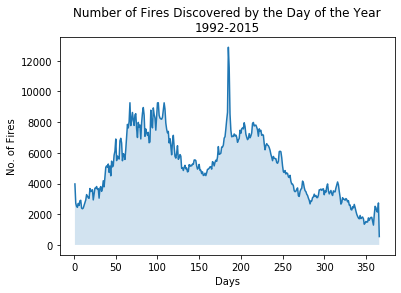

In [150]:
# Extracting the number of fires by discovery day of the year
y = (data.groupby(['discovery doy']))['objectid'].count()

plt.plot(y.index,y.values)
plt.fill_between(y.index,y.values, alpha = 0.2)
plt.xlabel('Days')
plt.ylabel('No. of Fires')
plt.title('Number of Fires Discovered by the Day of the Year\n1992-2015')

Text(0.5, 0.98, 'Trend in Discovery Day of Fires \n (1992 - 2015)')

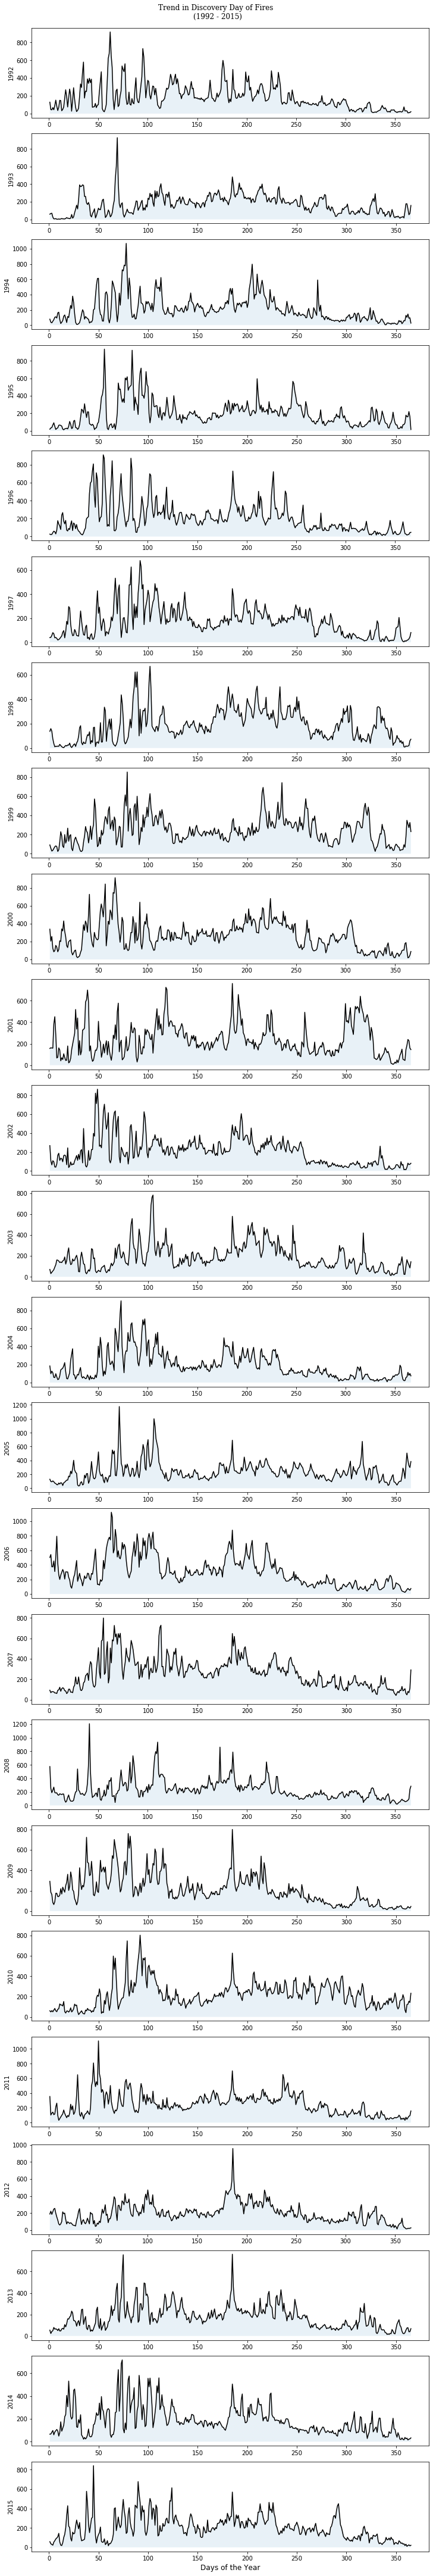

In [141]:
# Extracting the discovery day of the fires for each year in 1992-2015 
y = (data.groupby(['fire year','discovery doy']))['objectid'].count()

fig,ax = plt.subplots(len(y.index.levels[0]),1, figsize = (10,60), constrained_layout = True)

year_list = list(y.index.levels[0])
    
for i in range(len(year_list)):
    j = i//26
    k = i - (j*26)
    ax[i].plot(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, c= 'black')
    ax[i].fill_between(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, alpha = 0.1)
    ax[i].set(ylabel = year_list[i])
plt.xlabel('Days of the Year', fontsize = 12)
fig.suptitle('Trend in Discovery Day of Fires \n (1992 - 2015)', fontdict = font_title)

Text(0.5, 0.98, 'Trend in Number of Fires Discovered in Different States \n              by the Discovery Date')

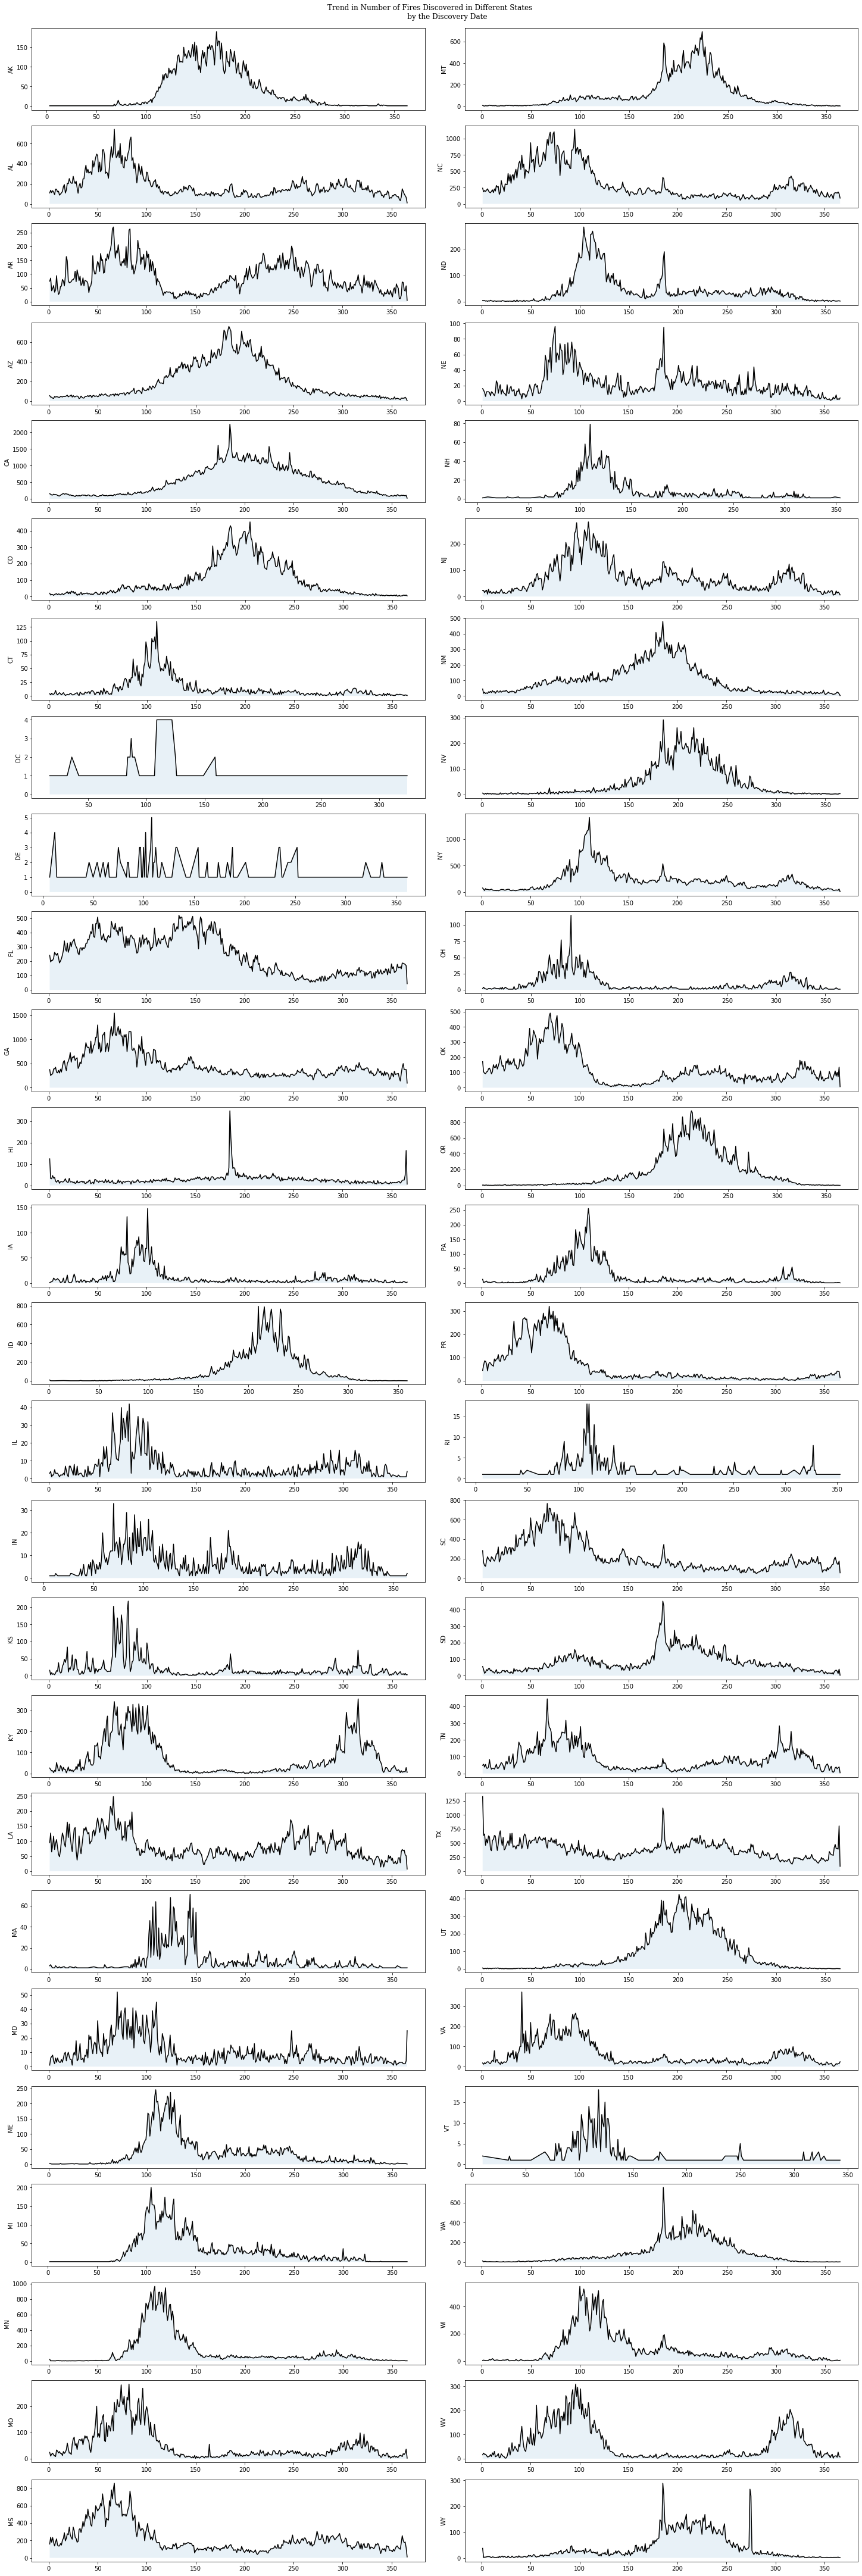

In [152]:
# Extracting discovery day of fire for each state
y = (data.groupby(['state','discovery doy']))['objectid'].count()

fig,ax = plt.subplots(26,2, figsize = (20,60), constrained_layout = True)

state_list = list(y.index.levels[0])
    
for i in range(len(state_list)):
    j = i//26
    k = i - (j*26)
    ax[k,j].plot(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, color = 'black')
    ax[k,j].fill_between(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, alpha = 0.1)
    ax[k,j].set(ylabel = state_list[i])

fig.suptitle('Trend in Number of Fires Discovered in Different States \n \
             by the Discovery Date', fontdict = font_title)   

Text(0.5, 0, 'Day of the Year')

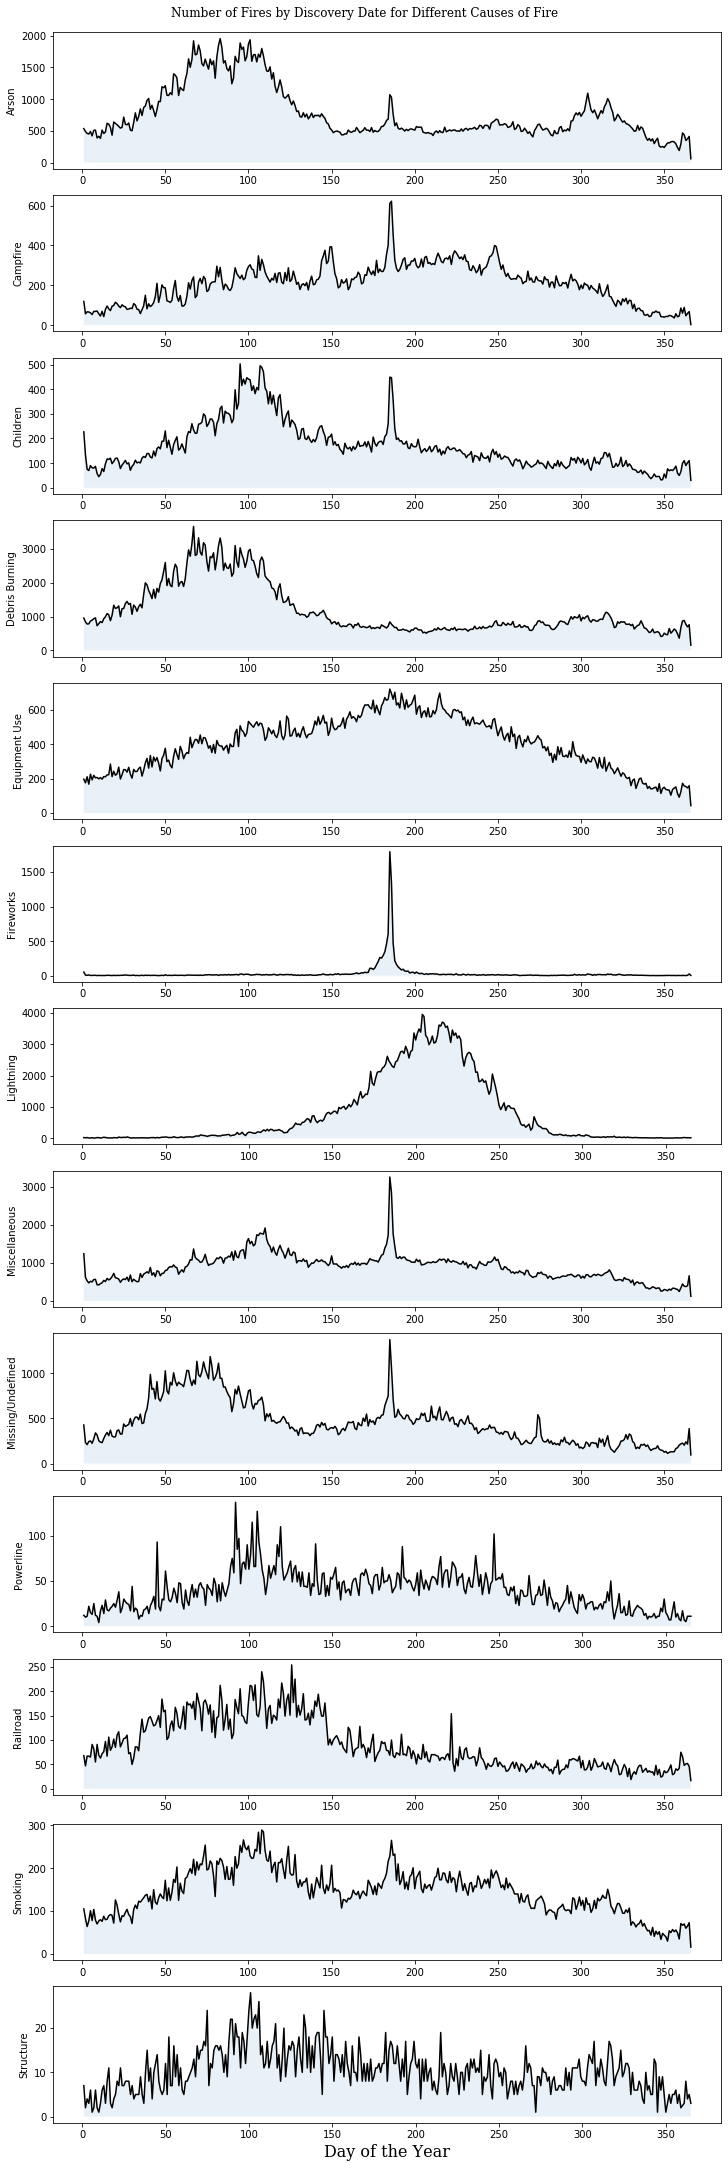

In [156]:
# Extracting discovery day of fire based on fire cause
y = (data.groupby(['stat cause descr','discovery doy']))['objectid'].count()

fig,ax = plt.subplots(13,1, figsize = (10,30), constrained_layout = True)

stat_cause_list = list(y.index.levels[0])
    
for i in range(len(stat_cause_list)):
    j = i//26
    k = i - (j*26)
    ax[i].plot(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, c= 'black')
    ax[i].fill_between(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, alpha = 0.1)
    
    ax[i].set(ylabel = stat_cause_list[i])

fig.suptitle('Number of Fires by Discovery Date for Different Causes of Fire', fontdict = font_title)

plt.xlabel('Day of the Year', fontdict = font_labels)

Text(0.5, 0, 'Day of the year')

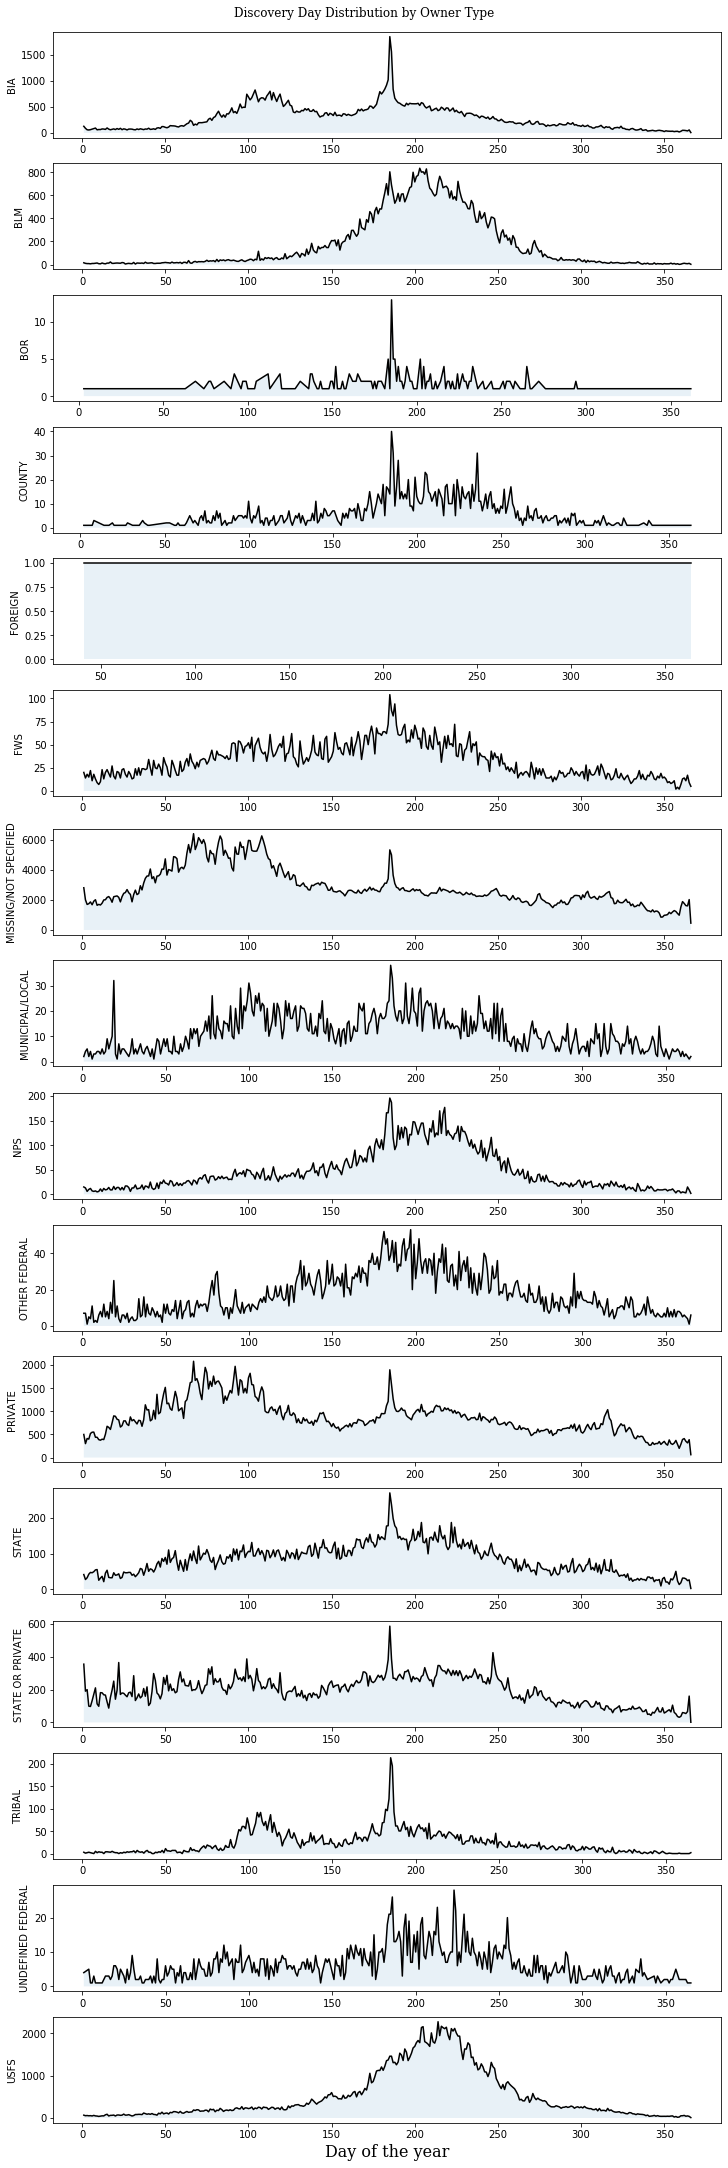

In [157]:
# Extracting the number of Fires occuring on different days of the year by owner type
y = (data.groupby(['owner descr','discovery doy']))['objectid'].count()

fig,ax = plt.subplots(len(y.index.levels[0]),1, figsize = (10,30), constrained_layout = True)

owner_list = list(y.index.levels[0])
    
for i in range(len(owner_list)):
    j = i//26
    k = i - (j*26)
    ax[i].plot(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, c= 'black')
    ax[i].fill_between(y[y.index.levels[0][i]].index, 
            y[y.index.levels[0][i]].values, alpha = 0.1)
    ax[i].set(ylabel = owner_list[i])
    
fig.suptitle('Discovery Day Distribution by Owner Type', fontdict = font_title)
plt.xlabel('Day of the year', fontdict= font_labels)

Missing/Not specified and Private owners - the main cause for fires earlier in the year. 
___

## Conclusion of the Analysis

There are trends in the data observed for different categories of the variables. For instance, there are different trends in fires over the years depending on the owner type. Some of these variables (such as state) depict the spatial distribution of the data. Moreover, each variable varies based on time and location. Therefore, a model is needed which will capture both the temporal and spatial trends in the data.  
___

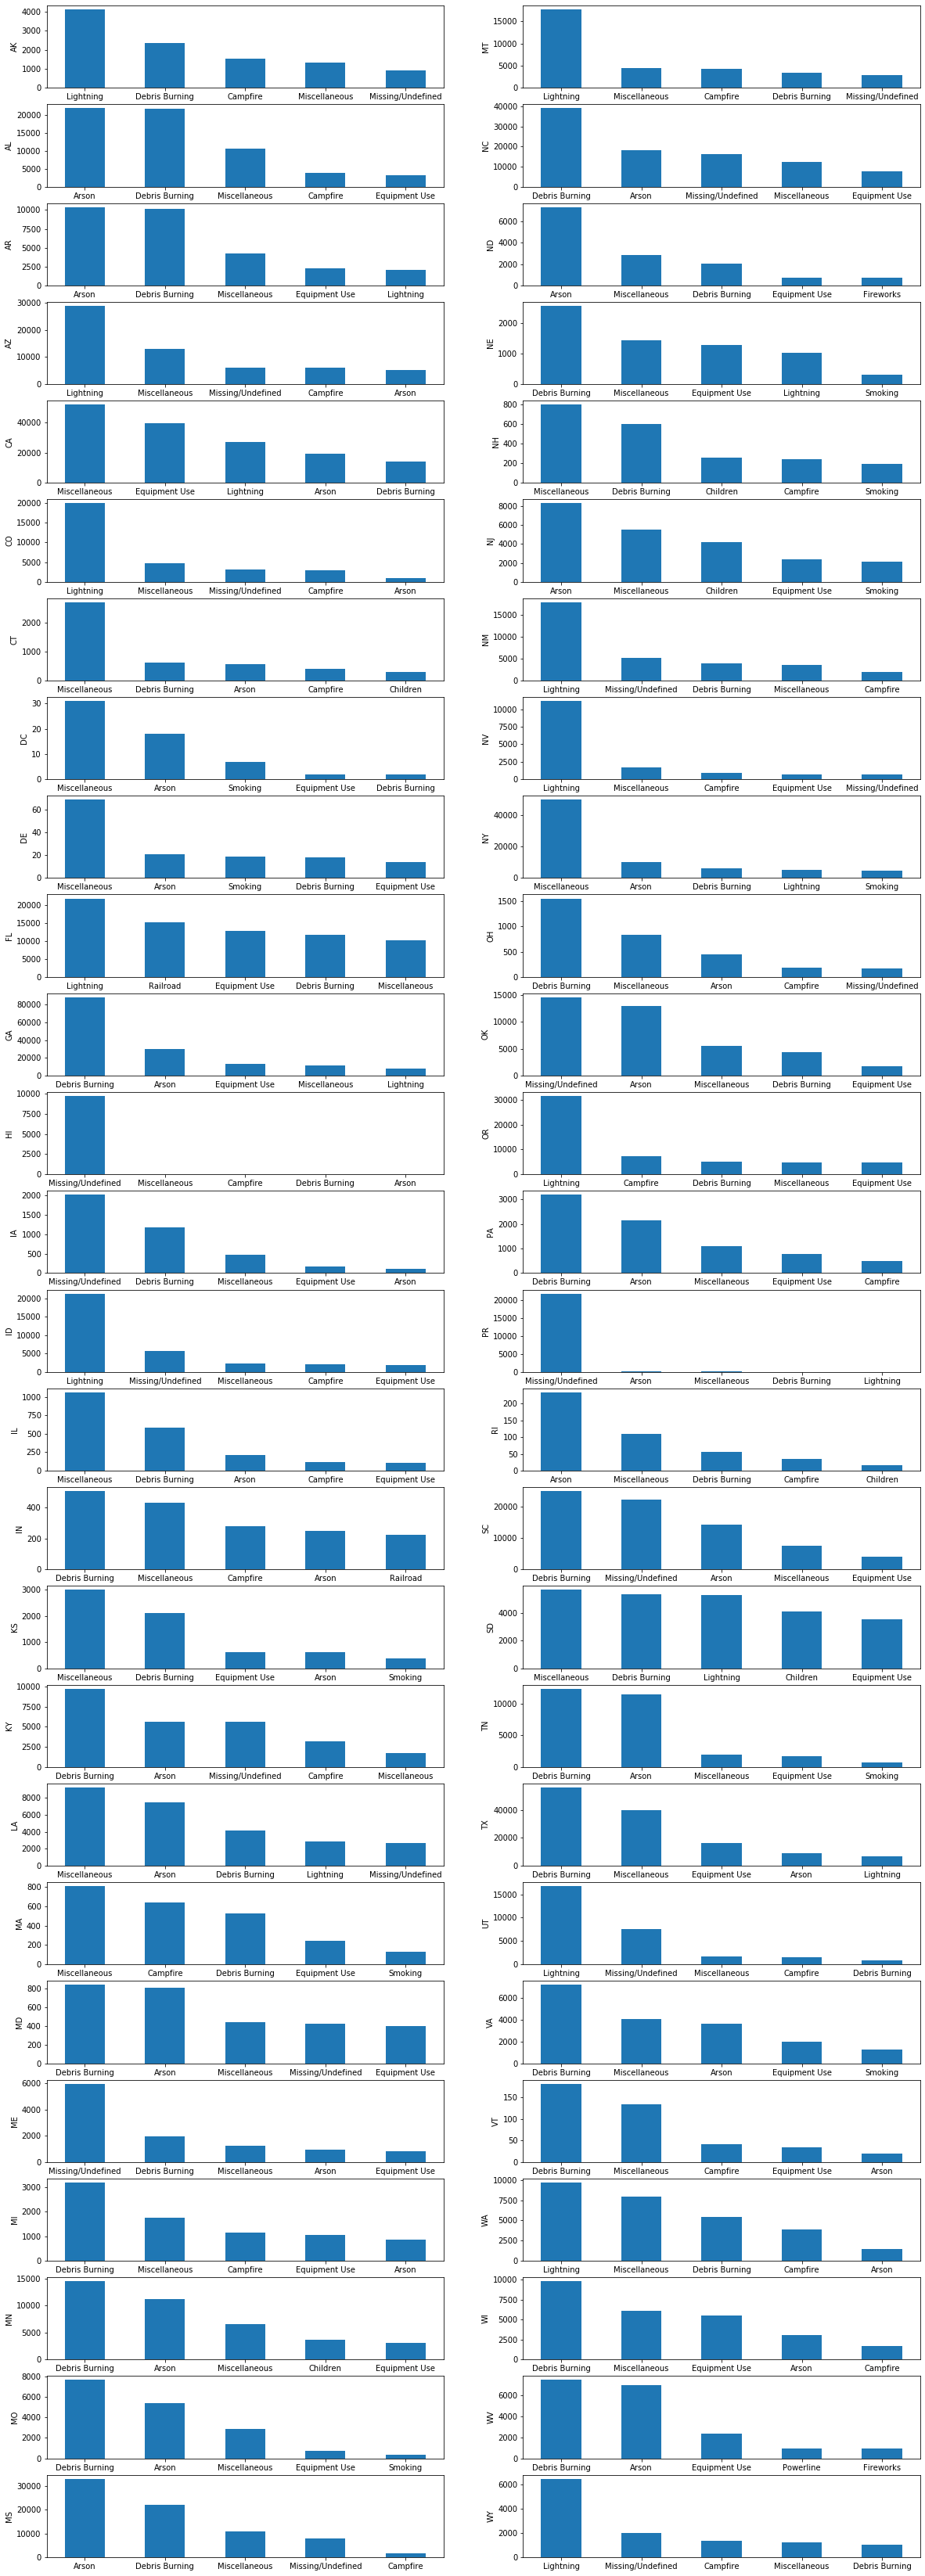

In [96]:
y = (data.groupby(['state','stat cause descr']))['objectid'].count()

state_list = y.index.levels[0]

fig, ax = plt.subplots(26,2,figsize = (20,60))

for i in range(len(state_list)):
    j = i//26
    k = i - (j*26)
    ax[k,j].bar(x = y[y.index.levels[0][i]].sort_values(ascending = False).index[:5], 
            height = y[y.index.levels[0][i]].sort_values(ascending = False).values[:5], width = 0.5)
    ax[k,j].set(ylabel = state_list[i])
    
